In [1]:
import os
import mokapot
import numpy as np
import pandas as pd
import sys
import matplotlib.pyplot as plt
import numpy as np
# to fix a bug in mokapot:`np.float_` was removed in the NumPy 2.0 release. Use `np.float64` instead.
np.float_ = np.float64 
np.random.seed(42)

import logging

# Change to True enable messages and nicely format them:
log = True
if log:
    logging.basicConfig(
        level=logging.INFO,
        format="%(levelname)s: %(message)s",
    )

In [2]:
psm_files = ['../data/YE_20180428_SK_HLA_A0202_3Ips_a50mio_R1_02.pin','../data/YE_20180428_SK_HLA_A0202_3Ips_a50mio_R1_01.pin']
psms = mokapot.read_pin(psm_files)
psms

INFO: Parsing PSMs...
INFO: Reading ../data/YE_20180428_SK_HLA_A0202_3Ips_a50mio_R1_02.pin...
d:\conda\envs\proteomics\Lib\site-packages\mokapot\parsers\pin.py:238: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  yield psms.apply(pd.to_numeric, errors="ignore")
INFO: Reading ../data/YE_20180428_SK_HLA_A0202_3Ips_a50mio_R1_01.pin...
INFO: Using 21 features:
INFO:   (1)	lnrSp
INFO:   (2)	deltLCn
INFO:   (3)	deltCn
INFO:   (4)	lnExpect
INFO:   (5)	Xcorr
INFO:   (6)	Sp
INFO:   (7)	IonFrac
INFO:   (8)	Mass
INFO:   (9)	PepLen
INFO:   (10)	Charge1
INFO:   (11)	Charge2
INFO:   (12)	Charge3
INFO:   (13)	Charge4
INFO:   (14)	Charge5
INFO:   (15)	Charge6
INFO:   (16)	enzN
INFO:   (17)	enzC
INFO:   (18)	enzInt
INFO:   (19)	lnNumSP
INFO:   (20)	dM
INFO:   (21)	absdM
INFO: Found 196637 PSMs.
INFO:   - 108579 target PSMs and 88058 decoy PSMs detected.


A mokapot.dataset.LinearPsmDataset with 196637 PSMs:
	- Protein confidence estimates enabled: False
	- Target PSMs: 108579
	- Decoy PSMs: 88058
	- Unique spectra: 39686
	- Unique peptides: 150535
	- Features: ('lnrSp', 'deltLCn', 'deltCn', 'lnExpect', 'Xcorr', 'Sp', 'IonFrac', 'Mass', 'PepLen', 'Charge1', 'Charge2', 'Charge3', 'Charge4', 'Charge5', 'Charge6', 'enzN', 'enzC', 'enzInt', 'lnNumSP', 'dM', 'absdM')

In [3]:
def remove_prev_and_next_aa(peptide):
    return peptide[2:-2]

def remove_modifications(peptide):
    return ''.join([aa for aa in peptide if aa.isalpha()])

# extract psms whose peptide length is between 9 and 14, and remove modifications and previous and next amino acids
df_psms_processed = psms.data
df_psms_processed['Peptide'] = df_psms_processed['Peptide'].apply(remove_prev_and_next_aa).apply(remove_modifications)
df_psms_processed = df_psms_processed[(df_psms_processed['PepLen'] >= 9) & (df_psms_processed['PepLen'] <= 14)]
df_psms_processed


,SpecId,Label,ScanNr,ExpMass,CalcMass,lnrSp,deltLCn,deltCn,lnExpect,Xcorr,...,Charge5,Charge6,enzN,enzC,enzInt,lnNumSP,dM,absdM,Peptide,Proteins
0,../mzML/YE_20180428_SK_HLA_A0202_3Ips_a50mio_R...,True,3,846.294800,846.311182,0.693147,0.261368,0.068705,1.660576,0.648230,...,0,0,0,0,0,9.962228,-0.000019,0.000019,GGDPDDGDV,sp|Q8NEL9|DDHD1_HUMAN
5,../mzML/YE_20180428_SK_HLA_A0202_3Ips_a50mio_R...,False,8,1162.660278,1159.656881,0.000000,0.063823,0.001462,1.582912,0.768813,...,0,0,0,0,2,12.787702,0.002590,0.002590,KLLLTKEEEG,DECOY_DECOY_8761
6,../mzML/YE_20180428_SK_HLA_A0202_3Ips_a50mio_R...,False,8,1162.660278,1162.650673,0.000000,0.062452,0.003440,1.599988,0.767689,...,0,0,1,0,0,12.787702,0.000008,0.000008,QLLVDFLAFP,DECOY_DECOY_1357
7,../mzML/YE_20180428_SK_HLA_A0202_3Ips_a50mio_R...,False,8,1162.660278,1162.671803,0.000000,0.059215,0.057640,1.640101,0.765048,...,0,0,0,0,1,12.787702,-0.000010,0.000010,KLLDVLFLSD,DECOY_sp|Q5VW38|GP107_HUMAN
8,../mzML/YE_20180428_SK_HLA_A0202_3Ips_a50mio_R...,False,8,1162.660278,1160.631001,2.708050,0.001671,0.001671,2.309872,0.720950,...,0,0,0,0,0,12.787702,0.001748,0.001748,ASVPTLVQFQA,DECOY_sp|O60503|ADCY9_HUMAN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196632,../mzML/YE_20180428_SK_HLA_A0202_3Ips_a50mio_R...,False,48805,1798.906542,1796.928505,0.693147,0.000611,0.000000,6.906755,0.726669,...,0,0,0,0,3,11.291905,0.001101,0.001101,KEMEIIQKELKYMN,DECOY_sp|A1L4K1|FSD2_HUMAN
196633,../mzML/YE_20180428_SK_HLA_A0202_3Ips_a50mio_R...,False,48805,1798.906542,1797.877472,0.693147,0.000611,0.000000,6.906755,0.726669,...,0,0,0,0,3,11.291905,0.000572,0.000572,KEPSISRCYKWVMN,DECOY_sp|O00159|MYO1C_HUMAN
196634,../mzML/YE_20180428_SK_HLA_A0202_3Ips_a50mio_R...,False,48805,1798.906542,1795.926514,0.693147,0.000611,0.000000,6.906755,0.726669,...,0,0,0,0,1,11.291905,0.001659,0.001659,KEWENQTILVEFFL,DECOY_DECOY_5831
196635,../mzML/YE_20180428_SK_HLA_A0202_3Ips_a50mio_R...,False,48805,1798.906542,1796.932996,0.693147,0.000611,0.000611,6.906755,0.726669,...,0,0,0,0,3,11.291905,0.001098,0.001098,QELAIFEKWKEYRG,DECOY_DECOY_11366


In [4]:
psms_processed = mokapot.dataset.LinearPsmDataset(df_psms_processed, target_column='Label', spectrum_columns='SpecId', 
                                                  peptide_column='Peptide', protein_column='Proteins', feature_columns=tuple(psms.features.columns))
psms_processed

INFO: Using 21 features:
INFO:   (1)	lnrSp
INFO:   (2)	deltLCn
INFO:   (3)	deltCn
INFO:   (4)	lnExpect
INFO:   (5)	Xcorr
INFO:   (6)	Sp
INFO:   (7)	IonFrac
INFO:   (8)	Mass
INFO:   (9)	PepLen
INFO:   (10)	Charge1
INFO:   (11)	Charge2
INFO:   (12)	Charge3
INFO:   (13)	Charge4
INFO:   (14)	Charge5
INFO:   (15)	Charge6
INFO:   (16)	enzN
INFO:   (17)	enzC
INFO:   (18)	enzInt
INFO:   (19)	lnNumSP
INFO:   (20)	dM
INFO:   (21)	absdM
INFO: Found 146223 PSMs.
INFO:   - 81211 target PSMs and 65012 decoy PSMs detected.


A mokapot.dataset.LinearPsmDataset with 146223 PSMs:
	- Protein confidence estimates enabled: False
	- Target PSMs: 81211
	- Decoy PSMs: 65012
	- Unique spectra: 146223
	- Unique peptides: 108427
	- Features: ('lnrSp', 'deltLCn', 'deltCn', 'lnExpect', 'Xcorr', 'Sp', 'IonFrac', 'Mass', 'PepLen', 'Charge1', 'Charge2', 'Charge3', 'Charge4', 'Charge5', 'Charge6', 'enzN', 'enzC', 'enzInt', 'lnNumSP', 'dM', 'absdM')

In [5]:
moka_conf, models = mokapot.brew(psms_processed)
moka_conf.psms.head()

INFO: Splitting PSMs into 3 folds...
INFO: 
INFO: === Analyzing Fold 1 ===
INFO: Finding initial direction...
INFO: 	- Selected feature lnExpect with 452 PSMs at q<=0.01.
INFO: Selecting hyperparameters...
INFO: 	- class_weight = {0: 0.1, 1: 0.1}
INFO: Beginning training loop...
INFO: 	- Iteration 0: 1010 training PSMs passed.
INFO: 	- Iteration 1: 1364 training PSMs passed.
INFO: 	- Iteration 2: 1709 training PSMs passed.
INFO: 	- Iteration 3: 1832 training PSMs passed.
INFO: 	- Iteration 4: 1877 training PSMs passed.
INFO: 	- Iteration 5: 1904 training PSMs passed.
INFO: 	- Iteration 6: 1912 training PSMs passed.
INFO: 	- Iteration 7: 1931 training PSMs passed.
INFO: 	- Iteration 8: 1970 training PSMs passed.
INFO: 	- Iteration 9: 2006 training PSMs passed.
INFO: Normalized feature weights in the learned model:
INFO:     Feature   Weight
INFO:     lnrSp     -0.8899376093325798
INFO:     deltLCn   0.6516453054928784
INFO:     deltCn    0.19012498875512202
INFO:     lnExpect  -0.463330

,SpecId,Label,ScanNr,ExpMass,CalcMass,Peptide,mokapot score,mokapot q-value,mokapot PEP,Proteins
0,../mzML/YE_20180428_SK_HLA_A0202_3Ips_a50mio_R...,True,20940,1452.721605,1452.721666,KLFDDDDSGKISL,0.964520,0.000927,0.000009,sp|O15182|CETN3_HUMAN
1,../mzML/YE_20180428_SK_HLA_A0202_3Ips_a50mio_R...,True,17335,1389.719286,1389.719498,KLIECGWKDQL,0.834252,0.000927,0.000031,sp|Q9NPA8|ENY2_HUMAN\tDECOY_DECOY_13374
2,../mzML/YE_20180428_SK_HLA_A0202_3Ips_a50mio_R...,True,10381,1416.664476,1416.660128,EEANNDLENKIQ,0.830099,0.000927,0.000032,sp|P35527|K1C9_HUMAN\tsp|K1C9_HUMAN|
3,../mzML/YE_20180428_SK_HLA_A0202_3Ips_a50mio_R...,True,27965,1329.634691,1329.632991,MLFPHISPCEV,0.811540,0.000927,0.000038,sp|Q86YD1|PTOV1_HUMAN
4,../mzML/YE_20180428_SK_HLA_A0202_3Ips_a50mio_R...,True,22772,1514.736498,1514.737316,KLFDDDETGKISF,0.780299,0.000927,0.000051,sp|P41208|CETN2_HUMAN\tDECOY_DECOY_9111\tDECOY...


In [6]:
comet_conf = psms_processed.assign_confidence()

INFO: Selected lnExpect as the best feature.
INFO: Assigning confidence...
INFO: Performing target-decoy competition...
INFO: Keeping the best match per SpecId columns...
INFO: 	- Found 146223 PSMs from unique spectra.
INFO: 	- Found 108427 unique peptides.
INFO: Assiging q-values to PSMs...
INFO: 	- Found 662 PSMs with q<=0.01
INFO: Assiging PEPs to PSMs...
INFO: Assiging q-values to peptides...
INFO: 	- Found 0 peptides with q<=0.01
INFO: Assiging PEPs to peptides...


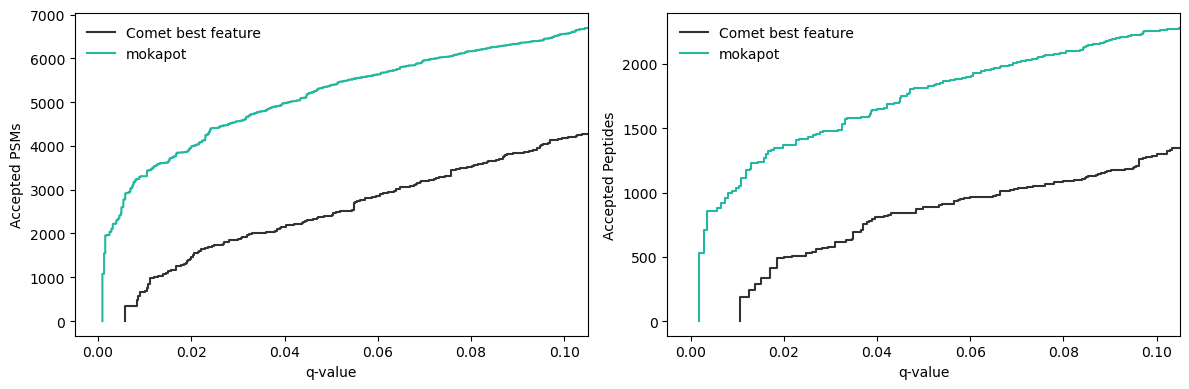

In [7]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
colors = ("#343131", "#24B8A0")

# Plot the performance:
for ax, level in zip(axs, ['psms', 'peptides']):
    comet_conf.plot_qvalues(level=level, c=colors[0], ax=ax, threshold=0.1,
                           label="Comet best feature")
    moka_conf.plot_qvalues(level=level, c=colors[1], ax=ax,
                           label="mokapot", threshold=0.1)
    ax.legend(frameon=False)

plt.tight_layout()
plt.show()

In [8]:
def read_PFM_as_df(filename):
    df = pd.read_csv(filename, sep="\t", header=None, index_col=0)
    df.drop(df.columns[-1], axis=1, inplace=True)
    return df

df = read_PFM_as_df('../data/deconvolution/ggseqlogo/pwm_L9_1_1.txt')

PFMs = {}
for i in range(8, 15):
    PFMs[i] = read_PFM_as_df(f'../data/deconvolution/ggseqlogo/pwm_L{i}_1_1.txt')

PFMs[8]

,1,2,3,4,5,6,7,8
0,,,,,,,,
A,2.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0
C,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
D,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
E,0.0,0.0,1.0,0.0,0.0,5.0,2.0,0.0
F,0.0,0.0,3.0,0.0,0.0,1.0,0.0,0.0
G,2.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0
H,0.0,0.0,0.0,2.0,1.0,1.0,0.0,0.0
I,2.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
K,1.0,0.0,0.0,3.0,0.0,0.0,2.0,0.0


In [9]:

def convert_to_ppm(pfm, pseudocount=1):
    pfm_pseudo = pfm + pseudocount
    column_sums = pfm_pseudo.sum(axis=0)
    ppm = pfm_pseudo.div(column_sums, axis=1)
    return ppm

def convert_to_pwm(ppm, background):
    pwm = np.log2(ppm.div(background, axis=0))
    return pwm

PWMs = {}
for i in range(8, 15):
    ppm = convert_to_ppm(PFMs[i], 0.8)
    PWMs[i] = convert_to_pwm(ppm, background=1/20)

PWMs[14]

,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,,,,,,,,,,,,,,
A,0.646363,-0.523562,-0.523562,-0.523562,0.646363,1.283793,-0.523562,-0.523562,-0.523562,-0.523562,-0.523562,0.646363,-0.523562,1.283793
C,-0.523562,-0.523562,-0.523562,-0.523562,-0.523562,-0.523562,-0.523562,-0.523562,-0.523562,-0.523562,-0.523562,-0.523562,-0.523562,-0.523562
D,-0.523562,-0.523562,-0.523562,2.061401,0.646363,-0.523562,0.646363,-0.523562,-0.523562,1.283793,-0.523562,1.724366,-0.523562,-0.523562
E,-0.523562,-0.523562,-0.523562,0.646363,-0.523562,0.646363,-0.523562,0.646363,1.283793,-0.523562,-0.523562,0.646363,0.646363,-0.523562
F,0.646363,-0.523562,1.283793,-0.523562,-0.523562,-0.523562,-0.523562,-0.523562,-0.523562,0.646363,0.646363,-0.523562,-0.523562,-0.523562
G,0.646363,-0.523562,-0.523562,0.646363,0.646363,0.646363,1.283793,1.283793,0.646363,0.646363,-0.523562,0.646363,-0.523562,-0.523562
H,-0.523562,-0.523562,-0.523562,-0.523562,-0.523562,-0.523562,0.646363,-0.523562,-0.523562,0.646363,0.646363,-0.523562,-0.523562,-0.523562
I,-0.523562,-0.523562,-0.523562,-0.523562,-0.523562,0.646363,-0.523562,-0.523562,-0.523562,-0.523562,-0.523562,-0.523562,-0.523562,-0.523562
K,-0.523562,-0.523562,-0.523562,-0.523562,-0.523562,-0.523562,-0.523562,-0.523562,0.646363,-0.523562,-0.523562,-0.523562,-0.523562,-0.523562


In [10]:
# no Sec(U) in PWM, treat it as Cys(C)
def sequence_score(sequence, pwm):

    return sum([pwm.loc[aa, i + 1] for i, aa in enumerate(sequence.replace('U', 'C'))])

# validate the score: sum of the row of the PWM
PWMs[9].sum(axis=1), sequence_score('AAAAAAAAA', PWMs[9])

(0
 A     1.106087
 C   -30.527704
 D   -24.765677
 E   -15.211502
 F   -12.705878
 G   -18.763476
 H   -15.627811
 I    -3.050792
 K    -8.570682
 L     5.435164
 M   -14.508251
 N   -13.568688
 P   -27.856664
 Q    -9.806547
 R   -17.464340
 S    -7.309593
 T    -7.455084
 V    -0.091292
 W   -41.370662
 Y   -17.371565
 dtype: float64,
 np.float64(1.1060872988400046))

In [11]:
# no Sec(U) in PWM, treat it as Cys(C)
def add_PWM_score(psms):
    psms['PWM_score'] = psms['Peptide'].apply(lambda x: sequence_score(x, PWMs[len(x)]))
    return psms

df_PWM_score = add_PWM_score(df_psms_processed.copy())
df_PWM_score

,SpecId,Label,ScanNr,ExpMass,CalcMass,lnrSp,deltLCn,deltCn,lnExpect,Xcorr,...,Charge6,enzN,enzC,enzInt,lnNumSP,dM,absdM,Peptide,Proteins,PWM_score
0,../mzML/YE_20180428_SK_HLA_A0202_3Ips_a50mio_R...,True,3,846.294800,846.311182,0.693147,0.261368,0.068705,1.660576,0.648230,...,0,0,0,0,9.962228,-0.000019,0.000019,GGDPDDGDV,sp|Q8NEL9|DDHD1_HUMAN,-14.317781
5,../mzML/YE_20180428_SK_HLA_A0202_3Ips_a50mio_R...,False,8,1162.660278,1159.656881,0.000000,0.063823,0.001462,1.582912,0.768813,...,0,0,0,2,12.787702,0.002590,0.002590,KLLLTKEEEG,DECOY_DECOY_8761,-1.511593
6,../mzML/YE_20180428_SK_HLA_A0202_3Ips_a50mio_R...,False,8,1162.660278,1162.650673,0.000000,0.062452,0.003440,1.599988,0.767689,...,0,1,0,0,12.787702,0.000008,0.000008,QLLVDFLAFP,DECOY_DECOY_1357,-6.648927
7,../mzML/YE_20180428_SK_HLA_A0202_3Ips_a50mio_R...,False,8,1162.660278,1162.671803,0.000000,0.059215,0.057640,1.640101,0.765048,...,0,0,0,1,12.787702,-0.000010,0.000010,KLLDVLFLSD,DECOY_sp|Q5VW38|GP107_HUMAN,-0.117170
8,../mzML/YE_20180428_SK_HLA_A0202_3Ips_a50mio_R...,False,8,1162.660278,1160.631001,2.708050,0.001671,0.001671,2.309872,0.720950,...,0,0,0,0,12.787702,0.001748,0.001748,ASVPTLVQFQA,DECOY_sp|O60503|ADCY9_HUMAN,-0.115799
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196632,../mzML/YE_20180428_SK_HLA_A0202_3Ips_a50mio_R...,False,48805,1798.906542,1796.928505,0.693147,0.000611,0.000000,6.906755,0.726669,...,0,0,0,3,11.291905,0.001101,0.001101,KEMEIIQKELKYMN,DECOY_sp|A1L4K1|FSD2_HUMAN,-2.012737
196633,../mzML/YE_20180428_SK_HLA_A0202_3Ips_a50mio_R...,False,48805,1798.906542,1797.877472,0.693147,0.000611,0.000000,6.906755,0.726669,...,0,0,0,3,11.291905,0.000572,0.000572,KEPSISRCYKWVMN,DECOY_sp|O00159|MYO1C_HUMAN,-7.329867
196634,../mzML/YE_20180428_SK_HLA_A0202_3Ips_a50mio_R...,False,48805,1798.906542,1795.926514,0.693147,0.000611,0.000000,6.906755,0.726669,...,0,0,0,1,11.291905,0.001659,0.001659,KEWENQTILVEFFL,DECOY_DECOY_5831,-0.842812
196635,../mzML/YE_20180428_SK_HLA_A0202_3Ips_a50mio_R...,False,48805,1798.906542,1796.932996,0.693147,0.000611,0.000611,6.906755,0.726669,...,0,0,0,3,11.291905,0.001098,0.001098,QELAIFEKWKEYRG,DECOY_DECOY_11366,-5.522512


In [12]:
feature_columns = list(psms.features.columns) + ['PWM_score']
psms_PWM_score = mokapot.dataset.LinearPsmDataset(df_PWM_score, target_column='Label', spectrum_columns='SpecId', 
                                                  peptide_column='Peptide', protein_column='Proteins', feature_columns=tuple(feature_columns))
psms_PWM_score

INFO: Using 22 features:
INFO:   (1)	lnrSp
INFO:   (2)	deltLCn
INFO:   (3)	deltCn
INFO:   (4)	lnExpect
INFO:   (5)	Xcorr
INFO:   (6)	Sp
INFO:   (7)	IonFrac
INFO:   (8)	Mass
INFO:   (9)	PepLen
INFO:   (10)	Charge1
INFO:   (11)	Charge2
INFO:   (12)	Charge3
INFO:   (13)	Charge4
INFO:   (14)	Charge5
INFO:   (15)	Charge6
INFO:   (16)	enzN
INFO:   (17)	enzC
INFO:   (18)	enzInt
INFO:   (19)	lnNumSP
INFO:   (20)	dM
INFO:   (21)	absdM
INFO:   (22)	PWM_score
INFO: Found 146223 PSMs.
INFO:   - 81211 target PSMs and 65012 decoy PSMs detected.


A mokapot.dataset.LinearPsmDataset with 146223 PSMs:
	- Protein confidence estimates enabled: False
	- Target PSMs: 81211
	- Decoy PSMs: 65012
	- Unique spectra: 146223
	- Unique peptides: 108427
	- Features: ('lnrSp', 'deltLCn', 'deltCn', 'lnExpect', 'Xcorr', 'Sp', 'IonFrac', 'Mass', 'PepLen', 'Charge1', 'Charge2', 'Charge3', 'Charge4', 'Charge5', 'Charge6', 'enzN', 'enzC', 'enzInt', 'lnNumSP', 'dM', 'absdM', 'PWM_score')

In [13]:
PWM_score_conf, model = mokapot.brew(psms_PWM_score)
PWM_score_conf.psms.head()

INFO: Splitting PSMs into 3 folds...
INFO: 
INFO: === Analyzing Fold 1 ===
INFO: Finding initial direction...
INFO: 	- Selected feature lnExpect with 732 PSMs at q<=0.01.
INFO: Selecting hyperparameters...
INFO: 	- class_weight = {0: 10, 1: 10}
INFO: Beginning training loop...
INFO: 	- Iteration 0: 1852 training PSMs passed.
INFO: 	- Iteration 1: 2780 training PSMs passed.
INFO: 	- Iteration 2: 3272 training PSMs passed.
INFO: 	- Iteration 3: 3624 training PSMs passed.
INFO: 	- Iteration 4: 3850 training PSMs passed.
INFO: 	- Iteration 5: 3943 training PSMs passed.
INFO: 	- Iteration 6: 3914 training PSMs passed.
INFO: 	- Iteration 7: 3970 training PSMs passed.
INFO: 	- Iteration 8: 3951 training PSMs passed.
INFO: 	- Iteration 9: 3967 training PSMs passed.
INFO: Normalized feature weights in the learned model:
INFO:     Feature    Weight
INFO:     lnrSp      -2.0638423561178265
INFO:     deltLCn    0.9822400421328885
INFO:     deltCn     0.05484559913687631
INFO:     lnExpect   -0.817

,SpecId,Label,ScanNr,ExpMass,CalcMass,Peptide,mokapot score,mokapot q-value,mokapot PEP,Proteins
0,../mzML/YE_20180428_SK_HLA_A0202_3Ips_a50mio_R...,True,20940,1452.721605,1452.721666,KLFDDDDSGKISL,0.707564,0.000469,0.000015,sp|O15182|CETN3_HUMAN
1,../mzML/YE_20180428_SK_HLA_A0202_3Ips_a50mio_R...,True,21218,1452.721727,1452.721666,KLFDDDDSGKISL,0.632513,0.000469,0.000036,sp|O15182|CETN3_HUMAN
2,../mzML/YE_20180428_SK_HLA_A0202_3Ips_a50mio_R...,True,20892,1452.721850,1452.721666,KLFDDDDSGKISL,0.614498,0.000469,0.000044,sp|O15182|CETN3_HUMAN
3,../mzML/YE_20180428_SK_HLA_A0202_3Ips_a50mio_R...,True,21160,1452.716112,1452.721666,KLFDDDDSGKISL,0.595829,0.000469,0.000055,sp|O15182|CETN3_HUMAN
4,../mzML/YE_20180428_SK_HLA_A0202_3Ips_a50mio_R...,True,22772,1514.736498,1514.737316,KLFDDDETGKISF,0.570992,0.000469,0.000073,sp|P41208|CETN2_HUMAN\tDECOY_DECOY_9111\tDECOY...


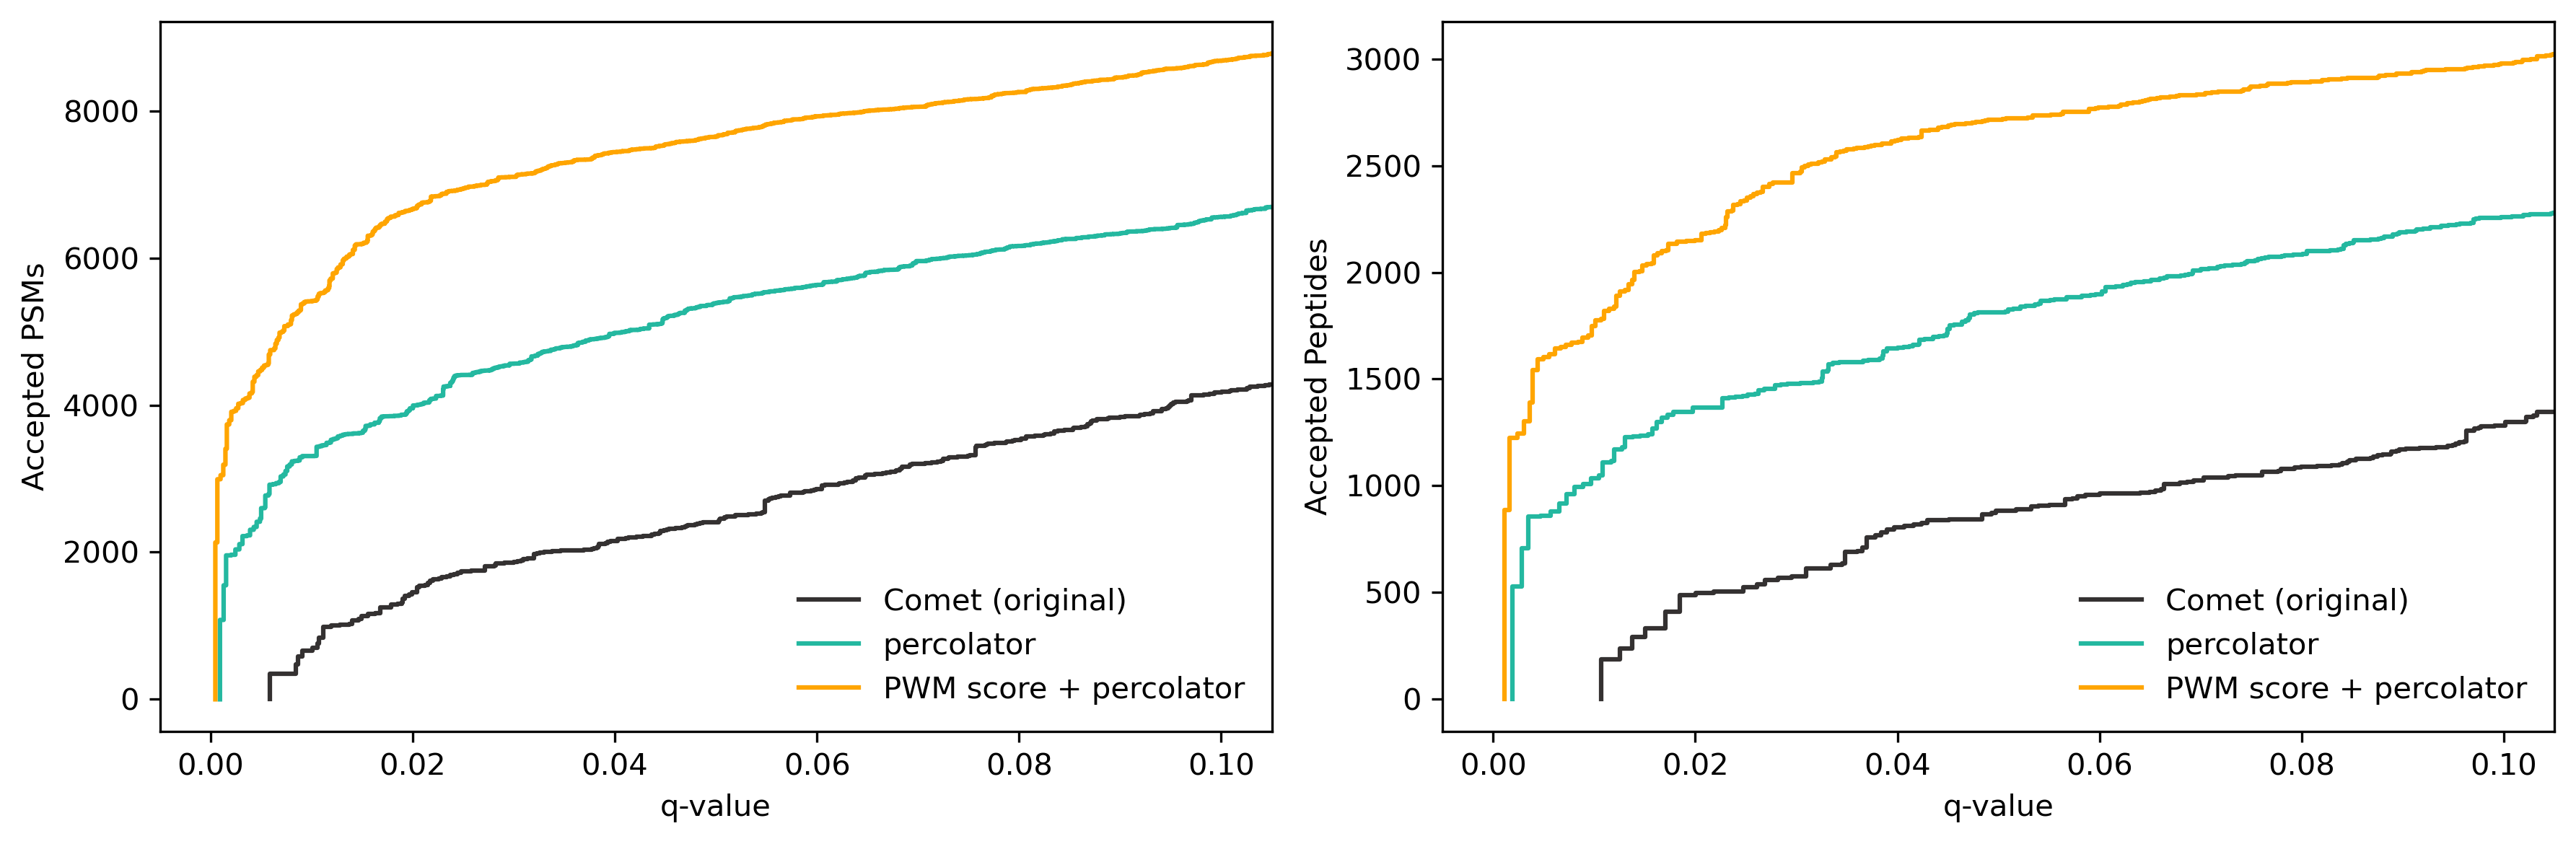

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4),dpi=300)
colors = ("#343131", "#24B8A0", "#FFA500")

# Plot the performance:
for ax, level in zip(axs, ['psms', 'peptides']):
    comet_conf.plot_qvalues(level=level, c=colors[0], ax=ax, threshold=0.1,
                           label="Comet (original)")
    moka_conf.plot_qvalues(level=level, c=colors[1], ax=ax,
                           label="percolator", threshold=0.1)
    PWM_score_conf.plot_qvalues(level=level, c=colors[2], ax=ax,
                            label="PWM score + percolator", threshold=0.1)
    ax.legend(frameon=False)

plt.tight_layout()
plt.savefig('../out/mokapot_comet_percolator_PWM_score.png')
plt.show()


In [15]:
comet_conf.psms

,SpecId,Label,ScanNr,ExpMass,CalcMass,Peptide,mokapot score,mokapot q-value,mokapot PEP,Proteins
0,../mzML/YE_20180428_SK_HLA_A0202_3Ips_a50mio_R...,True,25650,1652.752977,1652.755092,ALWDTAGQEDYDRL,-14.840140,0.005831,0.000023,sp|P61586|RHOA_HUMAN\tsp|P08134|RHOC_HUMAN\tsp...
1,../mzML/YE_20180428_SK_HLA_A0202_3Ips_a50mio_R...,True,13282,1422.690722,1422.689320,SAQGSDVSLTACKV,-12.559961,0.005831,0.000102,sp|P04439|HLAA_HUMAN
2,../mzML/YE_20180428_SK_HLA_A0202_3Ips_a50mio_R...,True,13514,1422.690233,1422.689320,SAQGSDVSLTACKV,-12.537967,0.005831,0.000103,sp|P04439|HLAA_HUMAN
3,../mzML/YE_20180428_SK_HLA_A0202_3Ips_a50mio_R...,True,13331,1422.691332,1422.689320,SAQGSDVSLTACKV,-12.386116,0.005831,0.000114,sp|P04439|HLAA_HUMAN
4,../mzML/YE_20180428_SK_HLA_A0202_3Ips_a50mio_R...,True,27071,1763.810961,1763.802376,LISWYDNEFGYSNR,-12.221289,0.005831,0.000127,sp|P04406|G3P_HUMAN
...,...,...,...,...,...,...,...,...,...,...
146213,../mzML/YE_20180428_SK_HLA_A0202_3Ips_a50mio_R...,True,3928,1243.927246,1240.893972,KALKKKKKIR,6.906755,0.800544,0.985185,sp|Q15020|SART3_HUMAN
146216,../mzML/YE_20180428_SK_HLA_A0202_3Ips_a50mio_R...,True,4427,2059.183933,2058.151480,KWRQRIRKWRQMNR,6.906755,0.800544,0.985185,DECOY_3921
146217,../mzML/YE_20180428_SK_HLA_A0202_3Ips_a50mio_R...,True,4427,2059.183933,2056.142369,KWRWQLEEERKRRR,6.906755,0.800544,0.985185,sp|Q07283|TRHY_HUMAN
146218,../mzML/YE_20180428_SK_HLA_A0202_3Ips_a50mio_R...,True,9878,2149.129050,2146.088894,FSRYWRRWNRFCRR,6.906755,0.800544,0.985185,sp|Q13936|CAC1C_HUMAN


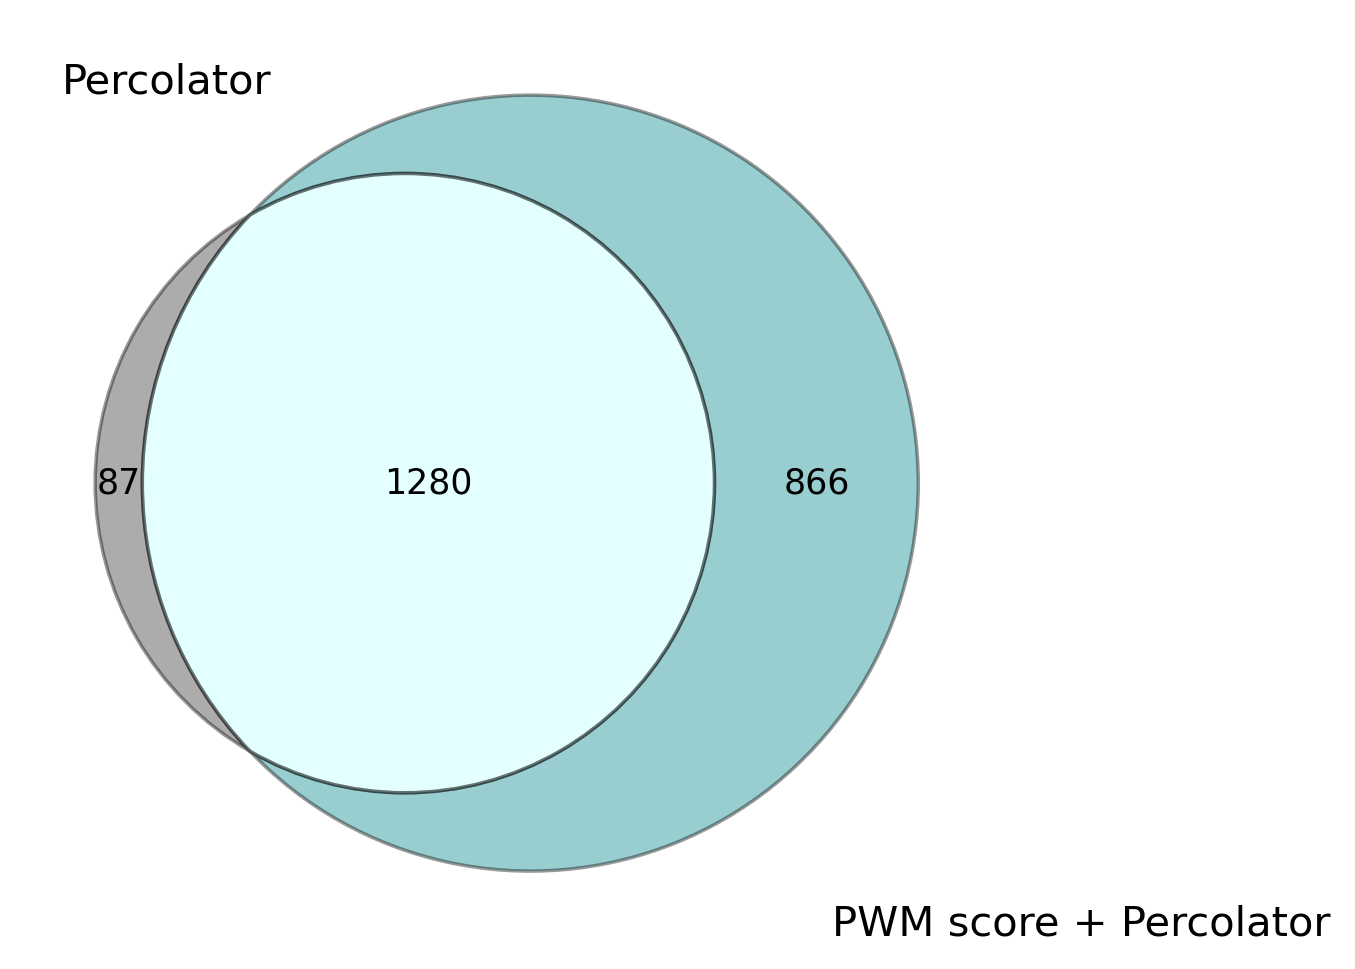

In [16]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

threshold = 0.01

comet_set = set(comet_conf.psms[comet_conf.psms['mokapot q-value'] <= threshold]['Peptide'])
moka_set = set(moka_conf.psms[moka_conf.psms['mokapot q-value'] <= threshold]['Peptide'])
PWM_score_set = set(PWM_score_conf.psms[PWM_score_conf.psms['mokapot q-value'] <= threshold]['Peptide'])

fig = plt.figure(figsize=(7,4), dpi=250)
venn = venn2([moka_set, PWM_score_set], set_labels=('Percolator', 'PWM score + Percolator'))

venn.get_patch_by_id('10').set_color("#343131")  
venn.get_patch_by_id('01').set_color('#00868B')  
venn.get_patch_by_id('11').set_color('#BBFFFF')  
for subset in ('10', '01', '11'):
    patch = venn.get_patch_by_id(subset)
    if patch:
        patch.set_edgecolor('black')  
        patch.set_linewidth(1)  

venn_labels = venn.set_labels
venn_labels[0].set_position((-0.3, 0.6))  
venn_labels[1].set_position((0.5, -0.6))  
plt.tight_layout()
plt.savefig('../out/venn.png')
plt.show()


In [17]:
novel_peptides_set = PWM_score_set - (PWM_score_set & moka_set)
novel_peptides_set

{'AAADIVNFL',
 'AFADIIHSL',
 'AIAERLCAL',
 'AICPNNHEV',
 'ALAAKECSL',
 'ALADAILINKTDL',
 'ALADGVVSQA',
 'ALADKELLPSV',
 'ALADQWQFL',
 'ALADVAYYTM',
 'ALADVMSQL',
 'ALAEAGVGL',
 'ALAEGCPRL',
 'ALAEKLDRL',
 'ALAELSESL',
 'ALAEMPDSAAAL',
 'ALAEMPDSAAALL',
 'ALAEQVQKA',
 'ALAERLDIV',
 'ALAERQSEL',
 'ALAFVLQHL',
 'ALAGDQPSV',
 'ALAGIVTNV',
 'ALAGLAQEV',
 'ALAKIEIKL',
 'ALAKLVEAI',
 'ALAKTEVSL',
 'ALALIYNEA',
 'ALANGIEEV',
 'ALANMHESL',
 'ALAPATPAL',
 'ALAPGLPTA',
 'ALAPHEEYI',
 'ALAPLLSSL',
 'ALAPMEAAKV',
 'ALAPMEAAKVRI',
 'ALAQAVQRA',
 'ALAQESACNNTL',
 'ALAQIPQKV',
 'ALASLNSSL',
 'ALATHILSL',
 'ALATLHDRM',
 'ALCENVEGSFL',
 'ALCGKLLTL',
 'ALCPAAQGL',
 'ALCPHLKTL',
 'ALCPRIHEV',
 'ALCPYVCHL',
 'ALFDCDGNGEL',
 'ALFDEQHREEM',
 'ALFEKNKEL',
 'ALFPALRPGGFQA',
 'ALFPGDSEIDQL',
 'ALFPGVALL',
 'ALFPHLLQPVL',
 'ALFQPHLINV',
 'ALFRDKVVAL',
 'ALFSDTPANA',
 'ALFSFLYHL',
 'ALGECYEKL',
 'ALGEPLYRV',
 'ALHDSSDYL',
 'ALHSKLQAL',
 'ALIDEQILCV',
 'ALIDRMVNL',
 'ALKDLINEA',
 'ALKEKIHEL',
 'ALKELMEIEEV',
 'ALK

In [18]:
def peptides_list_to_txt(peptides, filename):
    with open(filename, 'w') as f:
        for peptide in peptides:
            f.write(peptide + '\n')

peptides_list_to_txt(novel_peptides_set, '../out/peptides_novel.txt')
peptides_list_to_txt(comet_set, '../out/peptides_comet.txt')
peptides_list_to_txt(moka_set, '../out/peptides_moka.txt')
peptides_list_to_txt(PWM_score_set, '../out/peptides_PWM_score.txt')